In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

<Figure size 800x300 with 10 Axes>

In [3]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [8]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.9331 - acc: 0.3144 - val_loss: 1.8541 - val_acc: 0.3552
Epoch 2/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.8268 - acc: 0.3626 - val_loss: 1.8006 - val_acc: 0.3615
Epoch 3/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.7916 - acc: 0.3777 - val_loss: 1.8360 - val_acc: 0.3615
Epoch 4/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.7820 - acc: 0.3825 - val_loss: 1.7564 - val_acc: 0.3941
Epoch 5/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.7681 - acc: 0.3865 - val_loss: 1.8519 - val_acc: 0.3513
Epoch 6/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.7595 - acc: 0.3907 - val_loss: 1.7848 - val_acc: 0.3760
Epoch 7/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.7566 - acc: 0.3948 - val_loss: 1.7775 - val_acc

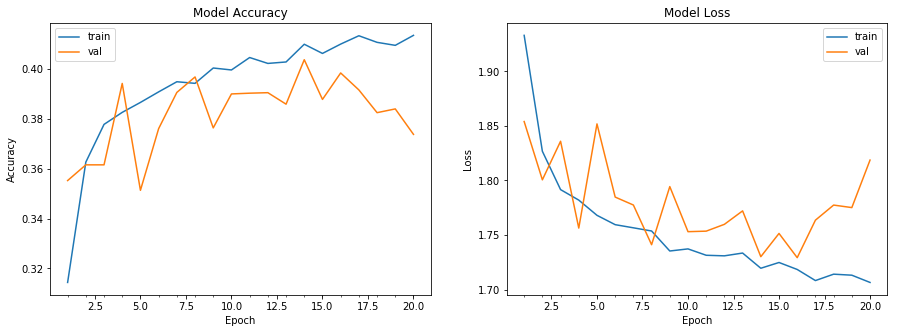

Training MLP took 28.11942982673645 seconds


In [9]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Definición de una red convolucional multicapa

In [6]:
32/3

10.666666666666666

In [15]:
# Convolutional Neural Network (CNN)
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.backend as K


del model
model = Sequential()
model.add(Conv2D(filters=int(48/2), kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=int(96/2), kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(filters=int(32/2), kernel_size=(1, 1), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=10, kernel_size=(4, 4), padding='valid'))
model.add(Flatten())
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 24)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 48)        10416     
_________________________________________________________________
activation_14 (Activation)   (None, 16, 16, 48)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 48)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 32)          1568      
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 49s 987us/step - loss: 1.8146 - acc: 0.3461 - val_loss: 1.5417 - val_acc: 0.4447
Epoch 2/50
50000/50000 [==============================] - 34s 679us/step - loss: 1.4471 - acc: 0.4824 - val_loss: 1.3519 - val_acc: 0.5234
Epoch 3/50
50000/50000 [==============================] - 39s 771us/step - loss: 1.3217 - acc: 0.5331 - val_loss: 1.2694 - val_acc: 0.5511
Epoch 4/50
50000/50000 [==============================] - 38s 762us/step - loss: 1.2450 - acc: 0.5605 - val_loss: 1.2450 - val_acc: 0.5608
Epoch 5/50
50000/50000 [==============================] - 36s 726us/step - loss: 1.1911 - acc: 0.5811 - val_loss: 1.1696 - val_acc: 0.5926
Epoch 6/50
50000/50000 [==============================] - 43s 851us/step - loss: 1.1479 - acc: 0.5971 - val_loss: 1.1235 - val_acc: 0.6067
Epoch 7/50
50000/50000 [==============================] - 36s 724us/step - loss: 1.1108 - acc: 0.6088 - val_loss: 1.

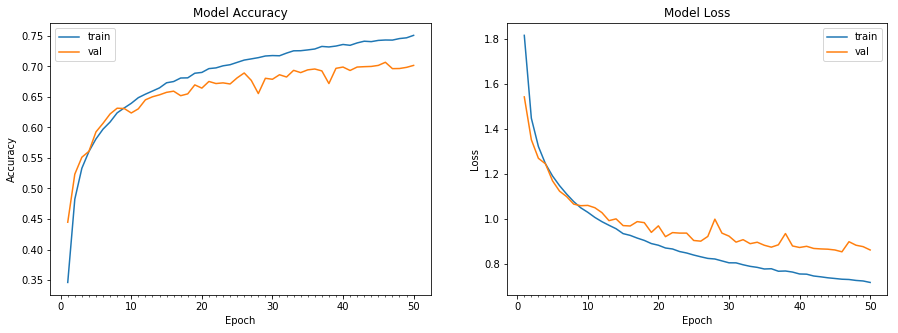

Training MLP took 6387.688879966736 seconds


In [14]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [18]:
# Convolutional Neural Network (CNN)
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.backend as K


del model
model = Sequential()
model.add(Conv2D(filters=int(48/2), kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=int(72), kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(filters=int(24), kernel_size=(1, 1), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=10, kernel_size=(4, 4), padding='valid'))
model.add(Flatten())
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 24)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 72)        15624     
_________________________________________________________________
activation_18 (Activation)   (None, 16, 16, 72)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 72)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 24)          1752      
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 41s 825us/step - loss: 1.7039 - acc: 0.3859 - val_loss: 1.4652 - val_acc: 0.4792
Epoch 2/50
50000/50000 [==============================] - 43s 862us/step - loss: 1.3842 - acc: 0.5076 - val_loss: 1.3284 - val_acc: 0.5259
Epoch 3/50
50000/50000 [==============================] - 41s 827us/step - loss: 1.2668 - acc: 0.5530 - val_loss: 1.2340 - val_acc: 0.5642
Epoch 4/50
50000/50000 [==============================] - 44s 886us/step - loss: 1.1909 - acc: 0.5818 - val_loss: 1.1796 - val_acc: 0.5901
Epoch 5/50
50000/50000 [==============================] - 36s 728us/step - loss: 1.1349 - acc: 0.6035 - val_loss: 1.1339 - val_acc: 0.5984
Epoch 6/50
50000/50000 [==============================] - 36s 724us/step - loss: 1.0836 - acc: 0.6230 - val_loss: 1.0796 - val_acc: 0.6280
Epoch 7/50
50000/50000 [==============================] - 36s 719us/step - loss: 1.0509 - acc: 0.6327 - val_loss: 1.

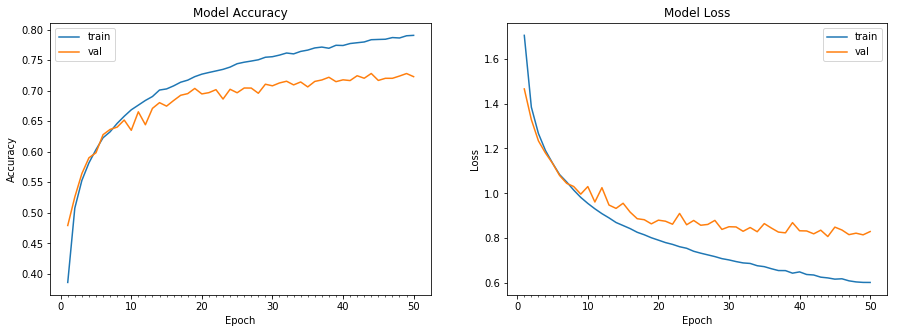

Training MLP took 8407.833796977997 seconds


In [19]:

import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

## Add regularization L2 -> 0.1

In [23]:
# Convolutional Neural Network (CNN)
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.backend as K
from keras import regularizers
del model
model = Sequential()
model.add(Conv2D(filters=48, kernel_size=(3, 3),kernel_regularizer=regularizers.l2(0.1), 
                 padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.1),  padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=192, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.1),  padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(1, 1), kernel_regularizer=regularizers.l2(0.1),  padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=10, kernel_size=(4, 4), padding='valid'))
model.add(Flatten())
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_34 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 96)        41568     
_________________________________________________________________
activation_35 (Activation)   (None, 16, 16, 96)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 192)         166080    
__________

In [29]:
# Convolutional Neural Network (CNN)
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.backend as K
from keras import regularizers
del model
model = Sequential()
model.add(Conv2D(filters=48, kernel_size=(3, 3),kernel_regularizer=regularizers.l2(0.1), 
                 padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.1),  padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(4, 4)))


model.add(Conv2D(filters=32, kernel_size=(1, 1), kernel_regularizer=regularizers.l2(0.1),  padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=10, kernel_size=(4, 4), padding='valid'))
model.add(Flatten())
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_59 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 16, 16, 96)        41568     
_________________________________________________________________
activation_60 (Activation)   (None, 16, 16, 96)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 4, 4, 32)          3104      
__________

In [30]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 4224/50000 [=>............................] - ETA: 1:34 - loss: 9.7734 - acc: 0.1262

KeyboardInterrupt: 

In [41]:
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
def RobModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    chanDim = -1
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    model = Sequential()
    # Zero-Padding: pads the border of X_input with zeroes
    #X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    model.add(Conv2D(32, (3, 3), padding="same",
    input_shape=input_shape))
    model.add(Activation("relu"))
    
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    #model.add(Dropout(drop))
    
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(drop))
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    #model.add(BatchNormalization())
    #model.add(Dropout(drop*1.8))

    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    
    ### END CODE HERE ###
    
    return model

cnn_model_cif = RobModel((32, 32, 3))
cnn_model_cif.compile(optimizer = "adam", loss="categorical_crossentropy", metrics = ["accuracy"])
cnn_model_cif.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 55s 1ms/step - loss: 1.5014 - acc: 0.4615 - val_loss: 1.2601 - val_acc: 0.5616
Epoch 2/20
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1081 - acc: 0.6078 - val_loss: 1.0450 - val_acc: 0.6348
Epoch 3/20
50000/50000 [==============================] - 52s 1ms/step - loss: 0.9249 - acc: 0.6756 - val_loss: 0.9092 - val_acc: 0.6808
Epoch 4/20
50000/50000 [==============================] - 53s 1ms/step - loss: 0.8048 - acc: 0.7193 - val_loss: 0.8942 - val_acc: 0.6899
Epoch 5/20
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7020 - acc: 0.7536 - val_loss: 0.7964 - val_acc: 0.7266
Epoch 6/20
50000/50000 [==============================] - 52s 1ms/step - loss: 0.6124 - acc: 0.7863 - val_loss: 0.7965 - val_acc: 0.7365
Epoch 7/20
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5230 - acc: 0.8165 - val_loss: 0.7831 - val_acc

KeyboardInterrupt: 

In [35]:
cnn_model_cif = RobModel((32, 32, 3))

In [36]:
cnn_model_cif.compile(optimizer = "adam", loss="categorical_crossentropy", metrics = ["accuracy"])

In [37]:
cnn_model_cif.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 226s 5ms/step - loss: 1.6154 - acc: 0.4840 - val_loss: 1.1567 - val_acc: 0.6016
Epoch 2/20
50000/50000 [==============================] - 236s 5ms/step - loss: 1.0698 - acc: 0.6264 - val_loss: 0.9863 - val_acc: 0.6605
Epoch 3/20
50000/50000 [==============================] - 229s 5ms/step - loss: 0.9002 - acc: 0.6834 - val_loss: 0.8358 - val_acc: 0.7048
Epoch 4/20
50000/50000 [==============================] - 218s 4ms/step - loss: 0.8039 - acc: 0.7181 - val_loss: 1.4496 - val_acc: 0.5672
Epoch 5/20
50000/50000 [==============================] - 195s 4ms/step - loss: 0.7291 - acc: 0.7453 - val_loss: 0.7125 - val_acc: 0.7555
Epoch 6/20
50000/50000 [==============================] - 198s 4ms/step - loss: 0.6630 - acc: 0.7676 - val_loss: 0.8851 - val_acc: 0.7084
Epoch 7/20
50000/50000 [==============================] - 190s 4ms/step - loss: 0.6146 - acc: 0.7845 - val_loss: 0.7679 - 

In [39]:
loss, acc = cnn_model_cif.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 0.7111633457660675
Test accuracy: 0.7919


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 37s 735us/step - loss: 1.4541 - acc: 0.4769 - val_loss: 1.2533 - val_acc: 0.5491
Epoch 2/20
50000/50000 [==============================] - 35s 708us/step - loss: 1.1115 - acc: 0.6108 - val_loss: 1.0509 - val_acc: 0.6297
Epoch 3/20
50000/50000 [==============================] - 36s 717us/step - loss: 0.9658 - acc: 0.6630 - val_loss: 0.9833 - val_acc: 0.6572
Epoch 4/20
50000/50000 [==============================] - 35s 705us/step - loss: 0.8618 - acc: 0.7000 - val_loss: 0.9289 - val_acc: 0.6811
Epoch 5/20
50000/50000 [==============================] - 36s 727us/step - loss: 0.7861 - acc: 0.7259 - val_loss: 0.8452 - val_acc: 0.7074
Epoch 6/20
50000/50000 [==============================] - 34s 689us/step - loss: 0.7125 - acc: 0.7515 - val_loss: 0.8218 - val_acc: 0.7177
Epoch 7/20
50000/50000 [==============================] - 34s 681us/step - loss: 0.6424 - acc: 0.7775 - val_loss: 0.

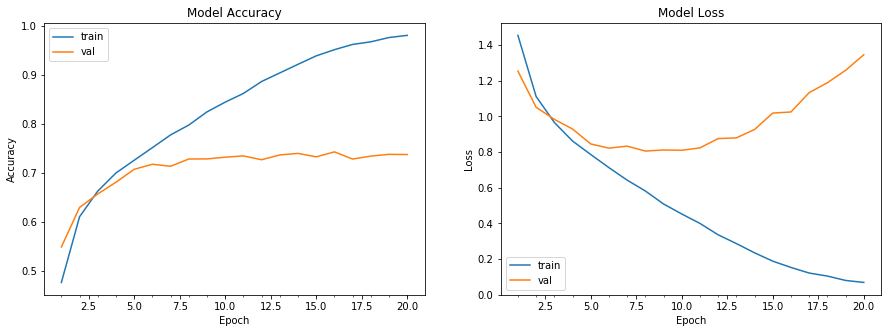

In [42]:
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
def RobModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    chanDim = -1
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    model = Sequential()
    # Zero-Padding: pads the border of X_input with zeroes
    #X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    model.add(Conv2D(32, (3, 3), padding="same",
    input_shape=input_shape))
    model.add(Activation("relu"))
    
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    #model.add(Dropout(drop))
    
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    #model.add(Conv2D(64, (3, 3), padding="same"))
    #model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(drop))
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    #model.add(BatchNormalization())
    #model.add(Dropout(drop*1.8))

    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    
    ### END CODE HERE ###
    
    return model

cnn_model_cif = RobModel((32, 32, 3))
cnn_model_cif.compile(optimizer = "adam", loss="categorical_crossentropy", metrics = ["accuracy"])
hist = cnn_model_cif.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

loss, acc = cnn_model_cif.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(hist)



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 21s 423us/step - loss: 1.6118 - acc: 0.4235 - val_loss: 1.3710 - val_acc: 0.5098
Epoch 2/20
50000/50000 [==============================] - 18s 363us/step - loss: 1.2941 - acc: 0.5416 - val_loss: 1.2126 - val_acc: 0.5739
Epoch 3/20
50000/50000 [==============================] - 18s 362us/step - loss: 1.1662 - acc: 0.5900 - val_loss: 1.1136 - val_acc: 0.6088
Epoch 4/20
50000/50000 [==============================] - 18s 362us/step - loss: 1.0760 - acc: 0.6217 - val_loss: 1.0853 - val_acc: 0.6210
Epoch 5/20
50000/50000 [==============================] - 19s 381us/step - loss: 1.0074 - acc: 0.6459 - val_loss: 1.0175 - val_acc: 0.6466
Epoch 6/20
50000/50000 [==============================] - 19s 373us/step - loss: 0.9551 - acc: 0.6668 - val_loss: 0.9981 - val_acc: 0.6513
Epoch 7/20
50000/50000 [==============================] - 18s 366us/step - loss: 0.9052 - acc: 0.6843 - val_loss: 0.

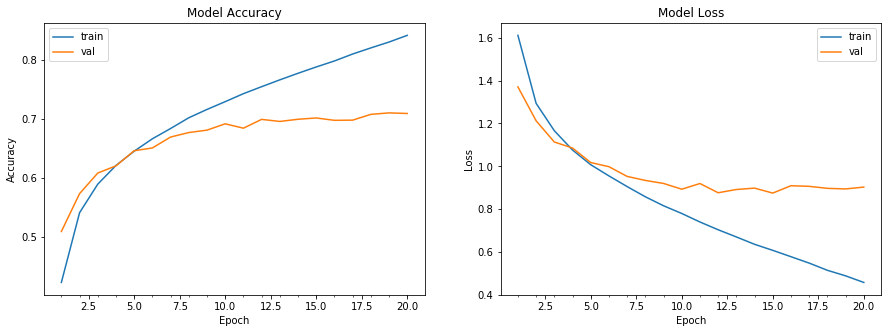

In [43]:
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
def RobModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    chanDim = -1
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    model = Sequential()
    # Zero-Padding: pads the border of X_input with zeroes
    #X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    model.add(Conv2D(16, (3, 3), padding="same",
    input_shape=input_shape))
    model.add(Activation("relu"))
    
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    #model.add(Dropout(drop))
    
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    #model.add(Conv2D(64, (3, 3), padding="same"))
    #model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(drop))
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation("relu"))
    #model.add(BatchNormalization())
    #model.add(Dropout(drop*1.8))

    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    
    ### END CODE HERE ###
    
    return model

cnn_model_cif = RobModel((32, 32, 3))
cnn_model_cif.compile(optimizer = "adam", loss="categorical_crossentropy", metrics = ["accuracy"])
hist = cnn_model_cif.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

loss, acc = cnn_model_cif.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(hist)
